In [ ]:
import pandas as pd
import numpy as np
import string
import random
from itertools import combinations
import networkx as nx 
import matplotlib.pyplot as plt

# Generating Random Dataset

In [ ]:
#the total number of different items = 26. randomly pick 'n' things.  put them in a tuple/set.
baskets = []
items = []
random.seed(2021)
for i in range(26):
  items.append(chr(i + 65))

for i in range(600): #change this for more points in the dataset
  #need at most 15 items in the basket - pick a random number between 1, 15 in each iteration giving the number of items in the basket - this number is 'n'
  n = random.randint(1, 15)
  basket = random.sample(items, n)  # Sampling without replacement
  baskets.append(list(basket))

baskets = np.array(baskets)
len(baskets)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


600

# Calculating Frequent Itemsets

In [ ]:
def getSupport(transactions, itemlist):
  item_ctr = dict()
  for item in itemlist:
    temp = set(item)    
    for basket in transactions:
      if temp.issubset(set(basket)):
        if item in item_ctr:
          item_ctr[tuple(sorted(item))] += 1
        else:
          item_ctr[tuple(sorted(item))] = 1
  return item_ctr

def getFrequentItemsets(support_vec, support_threshold):  
  frequent_itemsets = list()
  infrequent_itemsets = list()
  for key in support_vec:
    if support_vec[key] >= support_threshold:
      frequent_itemsets.append(key)
    else:
      infrequent_itemsets.append(key)
  return frequent_itemsets, infrequent_itemsets

def prune(itemlist, total_infreq_itemsets):
  to_delete = []
  for i in range(len(total_infreq_itemsets)):
    for j in range(len(itemlist)):
      if (set(total_infreq_itemsets[i]).issubset(set(itemlist[j]))):
        to_delete.append(j)
  del_list = list(set(to_delete))
  k = 0
  for i in del_list:
    del itemlist[i-k]
    k+=1
  return itemlist

def getItemlist(items, set_size, total_infreq_itemsets):
  itemlist = list(combinations(items, set_size))
  return prune(itemlist, total_infreq_itemsets)

In [ ]:
#transactions = [['A','B','C'],['A','C'],['A','D','E'],['B','C'],['A','B','C']]
#items = ['A','B','C','D','E']
transactions = baskets

k = 5  # will generate frequent itemsets of maximum length k
support_threshold = int(0.01 * len(transactions))  # providing support threshold as a fraction of the total transactions

all_freq_itemsets = []
total_infreq_itemsets = []
all_support_values = {}
for i in range(k):
  itemlist = getItemlist(items, i+1, total_infreq_itemsets)  # generate itemlist and prune
  support_vec = getSupport(transactions, itemlist)
  all_support_values.update(support_vec)
  print("Support values discovered in step",(i+1))
  print(support_vec)
  freq_itemsets, infreq_itemsets = getFrequentItemsets(support_vec, support_threshold)
  print("Frequent itemsets discovered in step",(i+1))
  print(freq_itemsets)
  all_freq_itemsets.append(freq_itemsets)
  total_infreq_itemsets.extend(infreq_itemsets)
  if(len(freq_itemsets) == 0):
    break

Support values discovered in step 1
{('A',): 165, ('B',): 189, ('C',): 185, ('D',): 210, ('E',): 201, ('F',): 191, ('G',): 163, ('H',): 177, ('I',): 201, ('J',): 186, ('K',): 170, ('L',): 186, ('M',): 208, ('N',): 182, ('O',): 192, ('P',): 182, ('Q',): 185, ('R',): 192, ('S',): 185, ('T',): 172, ('U',): 176, ('V',): 172, ('W',): 172, ('X',): 211, ('Y',): 183, ('Z',): 194}
Frequent itemsets discovered in step 1
[('A',), ('B',), ('C',), ('D',), ('E',), ('F',), ('G',), ('H',), ('I',), ('J',), ('K',), ('L',), ('M',), ('N',), ('O',), ('P',), ('Q',), ('R',), ('S',), ('T',), ('U',), ('V',), ('W',), ('X',), ('Y',), ('Z',)]
Support values discovered in step 2
{('A', 'B'): 64, ('A', 'C'): 59, ('A', 'D'): 73, ('A', 'E'): 59, ('A', 'F'): 60, ('A', 'G'): 58, ('A', 'H'): 62, ('A', 'I'): 73, ('A', 'J'): 68, ('A', 'K'): 54, ('A', 'L'): 57, ('A', 'M'): 74, ('A', 'N'): 64, ('A', 'O'): 60, ('A', 'P'): 70, ('A', 'Q'): 61, ('A', 'R'): 64, ('A', 'S'): 60, ('A', 'T'): 55, ('A', 'U'): 57, ('A', 'V'): 52, ('A'

In [ ]:
if(len(all_freq_itemsets[-1]) == 0):
  freq_itemsets = all_freq_itemsets[-2]
else:
  freq_itemsets = all_freq_itemsets[-1]

print((freq_itemsets))

[('A', 'B', 'C', 'D', 'E'), ('A', 'B', 'C', 'D', 'F'), ('A', 'B', 'C', 'D', 'G'), ('A', 'B', 'C', 'D', 'I'), ('A', 'B', 'C', 'D', 'K'), ('A', 'B', 'C', 'D', 'M'), ('A', 'B', 'C', 'D', 'O'), ('A', 'B', 'C', 'D', 'Q'), ('A', 'B', 'C', 'D', 'R'), ('A', 'B', 'C', 'D', 'U'), ('A', 'B', 'C', 'D', 'W'), ('A', 'B', 'C', 'D', 'X'), ('A', 'B', 'C', 'D', 'Z'), ('A', 'B', 'C', 'E', 'G'), ('A', 'B', 'C', 'E', 'H'), ('A', 'B', 'C', 'E', 'K'), ('A', 'B', 'C', 'E', 'M'), ('A', 'B', 'C', 'E', 'Q'), ('A', 'B', 'C', 'E', 'V'), ('A', 'B', 'C', 'E', 'Z'), ('A', 'B', 'C', 'F', 'M'), ('A', 'B', 'C', 'F', 'U'), ('A', 'B', 'C', 'F', 'Z'), ('A', 'B', 'C', 'G', 'J'), ('A', 'B', 'C', 'G', 'M'), ('A', 'B', 'C', 'G', 'N'), ('A', 'B', 'C', 'G', 'S'), ('A', 'B', 'C', 'G', 'U'), ('A', 'B', 'C', 'H', 'M'), ('A', 'B', 'C', 'H', 'Q'), ('A', 'B', 'C', 'H', 'Z'), ('A', 'B', 'C', 'I', 'M'), ('A', 'B', 'C', 'I', 'U'), ('A', 'B', 'C', 'I', 'W'), ('A', 'B', 'C', 'J', 'M'), ('A', 'B', 'C', 'J', 'N'), ('A', 'B', 'C', 'J', 'R'), 

#Generating Association Rules

In [ ]:
def getRules(pruned_list):
  l = len(pruned_list)
  i, j = 1, 0
  ante,cons = [], []
  for item in pruned_list:
    item = sorted(list(item))
    while i < l:

      for k in range(0,l):
        rotated_list = [item[(k + j) % len(item)] for k, x in enumerate(item)]
        a = tuple(rotated_list[:i])
        c = tuple(rotated_list[i:])
        if len(a) != 0 and len(c) != 0:
          ante.append(sorted(a))
        
          cons.append(sorted(c))
        j = j + 1

      j = 0
      i = i + 1

  
  '''ante = Remove(ante)
  cons = Remove(cons)'''

      
  return ante,cons

In [ ]:
antecedents, consequents = getRules(freq_itemsets[:1000])
print(antecedents)
print(consequents)

[['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C'], ['D'], ['E'], ['A'], ['B'], ['C']

In [ ]:
def getConfidence(ante, cons, sup = all_support_values):
  """
  X,Y are tuples from the ante and cons lists
  rules assumed to be of form X -> Y
  confidence = support(X and Y)/support(X) 

  this function returns a list of confidences corresponding to each rule X -> Y. 
  """
  confidence = []
  for i in range(len(ante)):
    conf = 0
    
    X = tuple(sorted(ante[i]))
    #print(X)
    Y = tuple(sorted(cons[i]))

    if len(X)!=0 and len(Y)!=0:
      sX = sup[X]
      sXY = sup[tuple(sorted(X+Y))]
      conf = sXY/sX
      
    confidence.append(conf)  

  return confidence



In [ ]:
conf =getConfidence(antecedents,consequents)
len(consequents)


4000

#Visualization

In [ ]:
ante = antecedents
conse = consequents

In [ ]:
'''
This function takes in as input the antecedents and consequents and draws a directed graph to visualize the association rules. The number of 
rules visualized = n_rules.

# Reference: https://intelligentonlinetools.com/blog/2018/02/10/how-to-create-data-visualization-for-association-rules-in-data-mining/
'''

def draw_association_graph(antecedents, consequents, n_rules):  
  G1 = nx.DiGraph()
  color_map=[]
  N = 50
  colors = np.random.rand(N)

  # Adding nodes to the graph
  for i in range (n_rules):      
    G1.add_nodes_from(["R"+str(i)])

    for a in antecedents[i]:   
      G1.add_nodes_from([a])
      G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

    for c in consequents[i]:
      G1.add_nodes_from([c])
      G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
  
  # Assigning colours to the nodes (green or yellow)
  for node in G1:
    if (len(node) == 1):
      color_map.append('green')
    elif (node[1].isnumeric()):
      color_map.append('yellow')
    else:
      color_map.append('green')       

  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  # Raising text positions
  for p in pos:
    pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

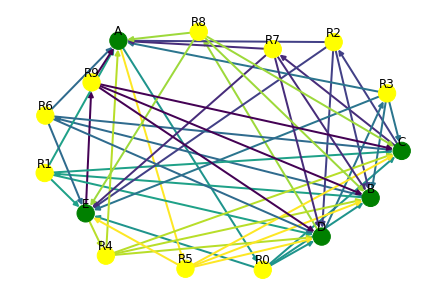

In [ ]:
draw_association_graph(ante, conse, 10)